# Drier LSTM Autoencoding
## 1. 데이터 확인

In [38]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df1 = pd.read_csv('./data/drying_actuator1.csv')
df2 = pd.read_csv('./data/drying_actuator2.csv')

df = pd.concat([df1, df2], axis=0)
df

,Date,Sensor
0,2020-11-07T00:11:11.302000+00:00,0.000000
1,2020-11-07T00:11:11.302000+00:00,0.000000
2,2020-11-07T00:11:11.302000+00:00,0.000000
3,2020-11-07T00:11:11.302000+00:00,0.000000
4,2020-11-07T00:11:11.302000+00:00,0.000000
...,...,...
1709051,2021-11-20T07:56:37.294000+00:00,1.542188
1709052,2021-11-20T07:56:37.294000+00:00,-0.242188
1709053,2021-11-20T07:56:37.294000+00:00,-0.140625
1709054,2021-11-20T07:56:37.294000+00:00,0.328125


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3418112 entries, 0 to 1709055
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Sensor  float64
dtypes: float64(1), object(1)
memory usage: 78.2+ MB


## 2. EDA

In [41]:
df['Date'].value_counts()

2021-11-18T05:14:23.408000+00:00    2048
2021-11-18T05:15:55.289000+00:00    2048
2020-11-18T05:15:55.289000+00:00    2048
2020-11-18T05:14:23.408000+00:00    2048
2020-11-10T07:28:56.391000+00:00    1024
                                    ... 
2021-11-14T05:28:56.651000+00:00    1024
2020-11-11T11:45:18.421000+00:00    1024
2021-11-09T16:18:29.219000+00:00    1024
2020-11-19T01:36:42.779000+00:00    1024
2021-11-12T03:37:37.221000+00:00    1024
Name: Date, Length: 3334, dtype: int64

In [42]:
# Date object를 datetime으로 변경
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M')
df.head()

,Date,Sensor
0,2020-11-07 00:11:11.302000+00:00,0.0
1,2020-11-07 00:11:11.302000+00:00,0.0
2,2020-11-07 00:11:11.302000+00:00,0.0
3,2020-11-07 00:11:11.302000+00:00,0.0
4,2020-11-07 00:11:11.302000+00:00,0.0


In [43]:
# 같은 시간에 측정한 센서 표시를 위한 index
df['index'] = df.groupby('Date').cumcount() + 1
df.head()

,Date,Sensor,index
0,2020-11-07 00:11:11.302000+00:00,0.0,1
1,2020-11-07 00:11:11.302000+00:00,0.0,2
2,2020-11-07 00:11:11.302000+00:00,0.0,3
3,2020-11-07 00:11:11.302000+00:00,0.0,4
4,2020-11-07 00:11:11.302000+00:00,0.0,5


In [44]:
# 1번 센서는 몇 번 측정되었는지 확인
df[df['index']==1]

,Date,Sensor,index
0,2020-11-07 00:11:11.302000+00:00,0.000000,1
1024,2020-11-07 00:22:18.460000+00:00,-0.007812,1
2048,2020-11-07 00:33:16.582000+00:00,0.000000,1
3072,2020-11-07 00:43:39.275000+00:00,0.000000,1
4096,2020-11-07 00:54:46.791000+00:00,0.000000,1
...,...,...,...
1703936,2021-11-20 07:07:33.192000+00:00,-0.403906,1
1704960,2021-11-20 07:20:02.823000+00:00,0.403906,1
1705984,2021-11-20 07:32:31.890000+00:00,-0.403906,1
1707008,2021-11-20 07:44:10.073000+00:00,-0.403906,1


In [45]:
df['index'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0             1
1             2
2             3
3             4
4             5
           ... 
1709051    1020
1709052    1021
1709053    1022
1709054    1023
1709055    1024
Name: index, Length: 3418112, dtype: int64>

In [46]:
counts = df.groupby(df['Date']).count()

# 센서에서 하나의 시그널에 1024bit가 나오기 때문에 == 1024
# 2048bit도 있었지만 1024가 더 많아서 1024 사용
curr_date = counts[counts['Sensor'] == 1024].index
df = df[df['Date'].isin(curr_date)]
df.head()

,Date,Sensor,index
0,2020-11-07 00:11:11.302000+00:00,0.0,1
1,2020-11-07 00:11:11.302000+00:00,0.0,2
2,2020-11-07 00:11:11.302000+00:00,0.0,3
3,2020-11-07 00:11:11.302000+00:00,0.0,4
4,2020-11-07 00:11:11.302000+00:00,0.0,5


In [47]:
df = flt_df.pivot(index='Date', columns='index', values='Sensor')
df.head()

index,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-07 00:11:11.302000+00:00,0.000000,0.000000,0.00000,0.000000,0.000000,-0.007812,-0.015625,-0.023438,-0.031250,0.00000,...,-0.023438,-0.03125,-0.023438,0.000000,0.000000,-0.031250,0.000000,-0.031250,0.000000,0.000000
2020-11-07 00:22:18.460000+00:00,-0.007812,0.000000,-0.03125,0.000000,-0.007812,-0.015625,-0.007812,-0.031250,-0.023438,0.00000,...,-0.031250,0.03125,-0.031250,-0.007812,0.000000,-0.023438,-0.023438,0.000000,0.000000,-0.031250
2020-11-07 00:33:16.582000+00:00,0.000000,-0.007812,-0.03125,-0.023438,0.000000,0.000000,-0.031250,-0.023438,0.000000,-0.03125,...,-0.023438,0.00000,-0.031250,0.000000,-0.023438,-0.031250,0.000000,-0.023438,-0.023438,0.000000
2020-11-07 00:43:39.275000+00:00,0.000000,-0.007812,0.00000,-0.007812,-0.031250,0.000000,-0.031250,0.000000,0.000000,0.00000,...,-0.007812,-0.03125,0.000000,0.000000,0.000000,-0.031250,0.000000,-0.007812,-0.039062,-0.015625
2020-11-07 00:54:46.791000+00:00,0.000000,0.007812,0.00000,0.000000,0.000000,-0.031250,0.000000,0.000000,-0.007812,0.00000,...,-0.007812,0.00000,0.000000,0.000000,0.000000,0.000000,-0.007812,0.000000,0.000000,-0.023438


In [48]:
df.shape

(3330, 1024)

In [ ]:
# Signal 시각화
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[0])
plt.show()

In [49]:
df_org = pd.DataFrame({
    "mean": df.mean(axis = 1), 
    "std" : df.std(axis = 1),
    "q0" : df.min(axis = 1),
    "q1" : df.quantile(0.25, axis = 1),
    "q2" : df.median(axis = 1),
    "q3" : df.quantile(0.75, axis = 1),
    "q4" : df.max(axis = 1),
    "minmax" : df.max(axis = 1) - df.min(axis = 1)})
df_org

,mean,std,q0,q1,q2,q3,q4,minmax
Date,,,,,,,,
2020-11-07 00:11:11.302000+00:00,-0.010025,0.022234,-0.109375,-0.023438,-0.007812,0.000000,0.062500,0.171875
2020-11-07 00:22:18.460000+00:00,-0.010651,0.021256,-0.093750,-0.023438,-0.007812,0.000000,0.101562,0.195312
2020-11-07 00:33:16.582000+00:00,-0.010963,0.022170,-0.109375,-0.023438,-0.007812,0.000000,0.093750,0.203125
2020-11-07 00:43:39.275000+00:00,-0.010521,0.022580,-0.101562,-0.023438,-0.007812,0.000000,0.085938,0.187500
2020-11-07 00:54:46.791000+00:00,-0.010735,0.023347,-0.117188,-0.023438,-0.007812,0.000000,0.109375,0.226562
...,...,...,...,...,...,...,...,...
2021-11-20 07:07:33.192000+00:00,0.018031,1.009635,-4.516406,-0.398438,-0.037891,0.414062,6.242188,10.758594
2021-11-20 07:20:02.823000+00:00,0.015554,1.085307,-4.920312,-0.414062,0.000000,0.437500,5.140625,10.060937
2021-11-20 07:32:31.890000+00:00,0.017804,1.140123,-4.663281,-0.460938,0.007812,0.437500,5.617969,10.281250


## 3. 학습
### 3-1. LSTM Autoencoder

In [88]:
from sklearn.model_selection import train_test_split

df = df_org.copy()
# train, test로 나눠서 train이 정상이라고 가정하고 진행
train, test = train_test_split(df, test_size=0.3, random_state=10)

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)
print(train.shape)
print(test.shape)

(2331, 8)
(999, 8)


In [90]:
# 모델에서 사용할 시퀀스 생성 (차수변경)
def create_sequences(values, time_steps=60):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

train = create_sequences(train)
print(train.shape)
test = create_sequences(test)
print(test.shape)

(2271, 60, 8)
(939, 60, 8)


In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *

model = Sequential()
model.add(LSTM(100, 
               input_shape=(train.shape[1], train.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(RepeatVector(train.shape[1]))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               43600     
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 60, 100)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            30200     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 60, 1)             51        
Total params: 73,851
Trainable params: 73,851
Non-trainable params: 0
_________________________________________________________________


In [92]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')

model.compile(optimizer='adam',loss='mean_squared_error')

m_story = model.fit(train, train, epochs=100, batch_size=200,
          validation_split=0.1, callbacks=[early_stop])

Epoch 1/100
11/11 [==============================] - 3s 132ms/step - loss: 0.1519 - val_loss: 0.0984
Epoch 2/100
11/11 [==============================] - 1s 107ms/step - loss: 0.0984 - val_loss: 0.0913
Epoch 3/100
11/11 [==============================] - 1s 108ms/step - loss: 0.0957 - val_loss: 0.0898
Epoch 4/100
11/11 [==============================] - 1s 114ms/step - loss: 0.0949 - val_loss: 0.0894
Epoch 5/100
11/11 [==============================] - 1s 108ms/step - loss: 0.0944 - val_loss: 0.0892
Epoch 6/100
11/11 [==============================] - 1s 119ms/step - loss: 0.0940 - val_loss: 0.0887
Epoch 7/100
11/11 [==============================] - 1s 120ms/step - loss: 0.0936 - val_loss: 0.0884
Epoch 8/100
11/11 [==============================] - 1s 118ms/step - loss: 0.0934 - val_loss: 0.0881
Epoch 9/100
11/11 [==============================] - 1s 124ms/step - loss: 0.0931 - val_loss: 0.0879
Epoch 10/100
11/11 [==============================] - 1s 115ms/step - loss: 0.0930 - val_lo

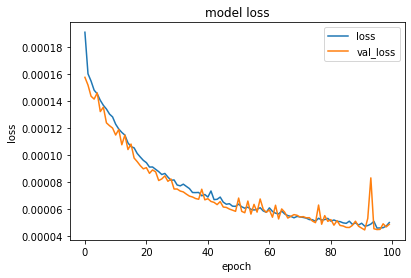

In [93]:
import matplotlib.pyplot as plt

plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right');

In [94]:
# threshold 구하기
train_pred = model.predict(train, verbose=0)
train_mae = np.mean(np.abs(train_pred - train), axis=1)

plt.hist(train_mae, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("Number of samples")
plt.show()

In [102]:
loss_df = pd.DataFrame(train_mae)
loss_df.head()

,0,1,2,3,4,5,6,7
0,0.163255,0.264963,0.373819,0.296531,0.151052,0.321638,0.283005,0.294841
1,0.162992,0.264500,0.374921,0.296374,0.151430,0.322100,0.282205,0.294119
2,0.163572,0.266252,0.369430,0.295766,0.157134,0.320774,0.280911,0.292222
3,0.162940,0.261630,0.366928,0.286805,0.156935,0.316320,0.278716,0.289882
4,0.158964,0.256734,0.360967,0.281277,0.154248,0.314228,0.273442,0.283439


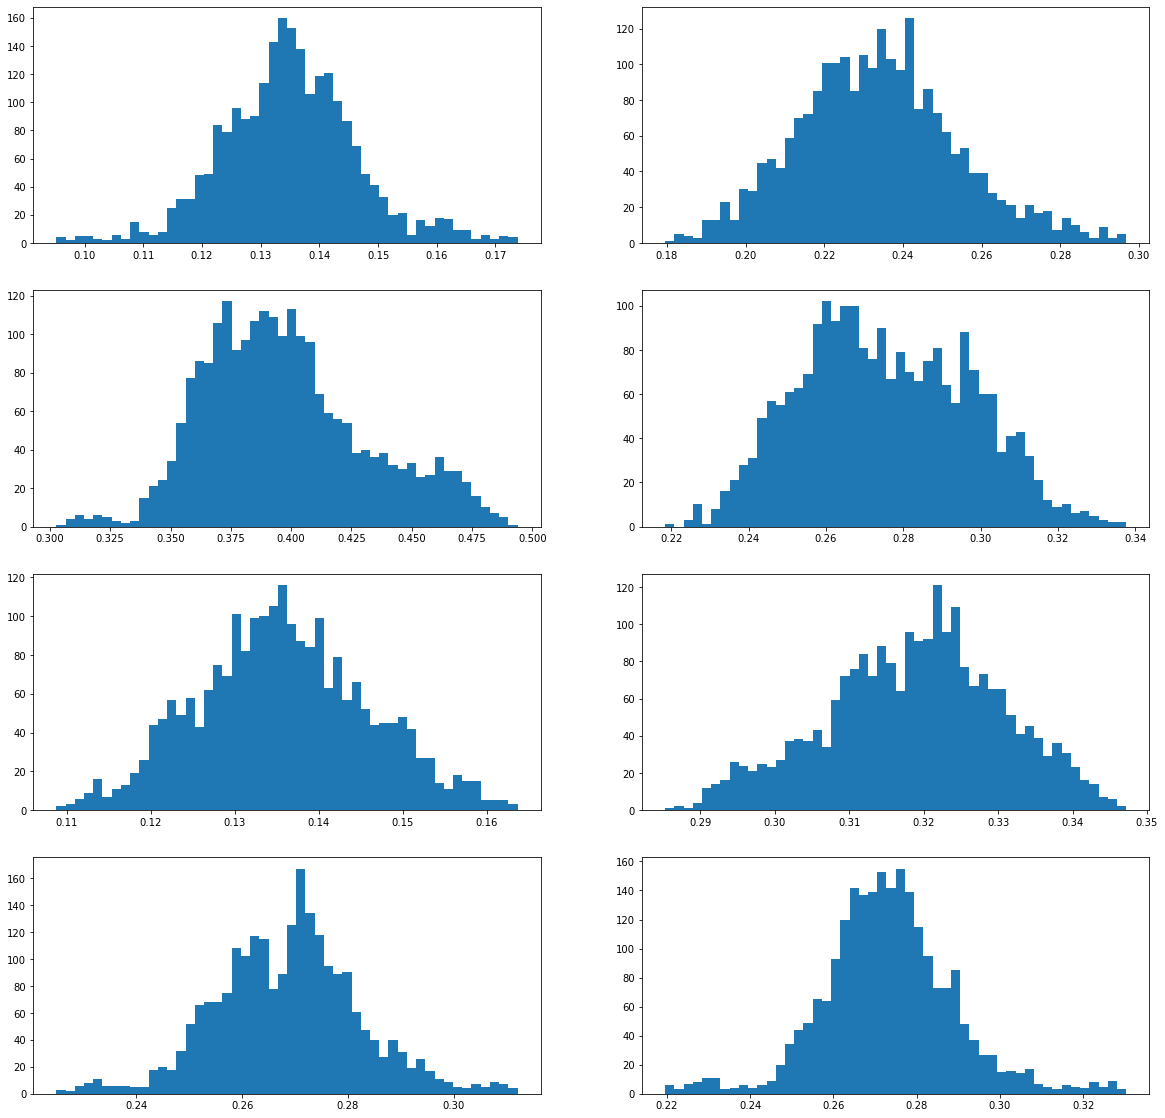

In [122]:
plt.figure(figsize=(20,20))
plt.subplot(421)
plt.hist(loss_df[0], bins=50)
plt.subplot(422)
plt.hist(loss_df[1], bins=50)
plt.subplot(423)
plt.hist(loss_df[2], bins=50)
plt.subplot(424)
plt.hist(loss_df[3], bins=50)
plt.subplot(425)
plt.hist(loss_df[4], bins=50)
plt.subplot(426)
plt.hist(loss_df[5], bins=50)
plt.subplot(427)
plt.hist(loss_df[6], bins=50)
plt.subplot(428)
plt.hist(loss_df[7], bins=50)
plt.show()

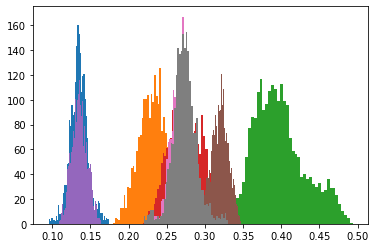

In [123]:
plt.hist(loss_df[0], bins=50)
plt.hist(loss_df[1], bins=50)
plt.hist(loss_df[2], bins=50)
plt.hist(loss_df[3], bins=50)
plt.hist(loss_df[4], bins=50)
plt.hist(loss_df[5], bins=50)
plt.hist(loss_df[6], bins=50)
plt.hist(loss_df[7], bins=50)
plt.show()

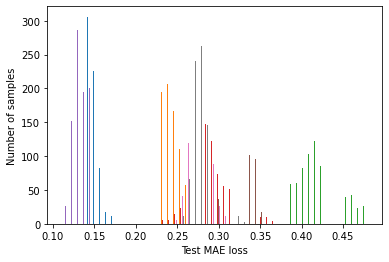

In [95]:
# 모델에 test 적용, 예측
test_pred = model.predict(test, verbose=0)
test_mae = np.mean(np.abs(test_pred - test), axis=1)

plt.hist(test_mae, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("Number of samples")
plt.show()

In [124]:
anomaly = pd.DataFrame(test_mae)
anomaly.head()

,0,1,2,3,4,5,6,7
0,0.134673,0.232144,0.430980,0.276912,0.148013,0.312034,0.267776,0.278750
1,0.137803,0.228722,0.437793,0.283766,0.145835,0.311697,0.267593,0.274638
2,0.138699,0.232509,0.441581,0.291123,0.144485,0.315300,0.268690,0.276099
3,0.134918,0.228220,0.437642,0.283032,0.143662,0.311340,0.267362,0.274011
4,0.135769,0.227419,0.438926,0.283024,0.143431,0.311453,0.266292,0.272878


In [140]:
anomaly['th0'] = 0.165
anomaly['th1'] = 0.28
anomaly['th2'] = 0.475
anomaly['th3'] = 0.32
anomaly['th4'] = 0.16
anomaly['th5'] = 0.345
anomaly['th6'] = 0.3
anomaly['th7'] = 0.32
anomaly.head()

,0,1,2,3,4,5,6,7,th0,th1,...,th6,th7,anomaly0,anomaly1,anomaly2,anomaly3,anomaly4,anomaly5,anomaly6,anomaly7
0,0.134673,0.232144,0.430980,0.276912,0.148013,0.312034,0.267776,0.278750,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
1,0.137803,0.228722,0.437793,0.283766,0.145835,0.311697,0.267593,0.274638,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
2,0.138699,0.232509,0.441581,0.291123,0.144485,0.315300,0.268690,0.276099,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
3,0.134918,0.228220,0.437642,0.283032,0.143662,0.311340,0.267362,0.274011,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
4,0.135769,0.227419,0.438926,0.283024,0.143431,0.311453,0.266292,0.272878,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0


In [141]:
# Anomaly = 1, Normal = 0
anomaly['anomaly0'] = np.where((anomaly[0] > anomaly['th0']), 1, 0)
anomaly['anomaly1'] = np.where((anomaly[1] > anomaly['th1']), 1, 0)
anomaly['anomaly2'] = np.where((anomaly[2] > anomaly['th2']), 1, 0)
anomaly['anomaly3'] = np.where((anomaly[3] > anomaly['th3']), 1, 0)
anomaly['anomaly4'] = np.where((anomaly[4] > anomaly['th4']), 1, 0)
anomaly['anomaly5'] = np.where((anomaly[5] > anomaly['th5']), 1, 0)
anomaly['anomaly6'] = np.where((anomaly[6] > anomaly['th6']), 1, 0)
anomaly['anomaly7'] = np.where((anomaly[7] > anomaly['th7']), 1, 0)
anomaly.head()

,0,1,2,3,4,5,6,7,th0,th1,...,th6,th7,anomaly0,anomaly1,anomaly2,anomaly3,anomaly4,anomaly5,anomaly6,anomaly7
0,0.134673,0.232144,0.430980,0.276912,0.148013,0.312034,0.267776,0.278750,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
1,0.137803,0.228722,0.437793,0.283766,0.145835,0.311697,0.267593,0.274638,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
2,0.138699,0.232509,0.441581,0.291123,0.144485,0.315300,0.268690,0.276099,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
3,0.134918,0.228220,0.437642,0.283032,0.143662,0.311340,0.267362,0.274011,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0
4,0.135769,0.227419,0.438926,0.283024,0.143431,0.311453,0.266292,0.272878,0.165,0.28,...,0.3,0.32,0,0,0,0,0,0,0,0


In [147]:
anomaly['anomaly_all'] = anomaly.apply(lambda x: x['anomaly0'] + x['anomaly1'] + x['anomaly2'] +
                              x['anomaly3'] + x['anomaly4'] + x['anomaly5'] + 
                              x['anomaly6'] + x['anomaly7'], axis=1)
anomaly['anomaly_all'].value_counts()

0.0    780
1.0     86
2.0     49
4.0     11
3.0     10
5.0      3
Name: anomaly_all, dtype: int64

In [149]:
anomaly['anomaly'] = np.where(anomaly['anomaly_all'] >= 3, "Anomaly", "Normal")
anomaly['anomaly'].value_counts()

Normal     915
Anomaly     24
Name: anomaly, dtype: int64

In [150]:
print(test.shape)
print(anomaly.shape)

(939, 60, 8)
(939, 26)


In [156]:
accuracy = anomaly[anomaly['anomaly']=='Normal'].count() / anomaly['anomaly'].count() * 100
accuracy

0              97.444089
1              97.444089
2              97.444089
3              97.444089
4              97.444089
5              97.444089
6              97.444089
7              97.444089
th0            97.444089
th1            97.444089
th2            97.444089
th3            97.444089
th4            97.444089
th5            97.444089
th6            97.444089
th7            97.444089
anomaly0       97.444089
anomaly1       97.444089
anomaly2       97.444089
anomaly3       97.444089
anomaly4       97.444089
anomaly5       97.444089
anomaly6       97.444089
anomaly7       97.444089
anomaly        97.444089
anomaly_all    97.444089
dtype: float64